In [125]:
# Workflow
# Example of a torch project

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# 1: Data (how to prepare and load data)
# Get data in numerical representation (into tensors)


# 2: Build the model

device(type='cuda')

In [126]:
X = torch.arange(0, 30)
Y = torch.arange(30, 60)
# Y = a + bX -> a = 30 and b = 1 linear regression

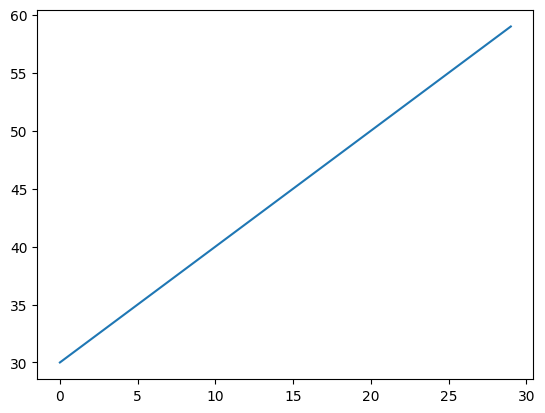

In [127]:
plt.plot(X, Y)

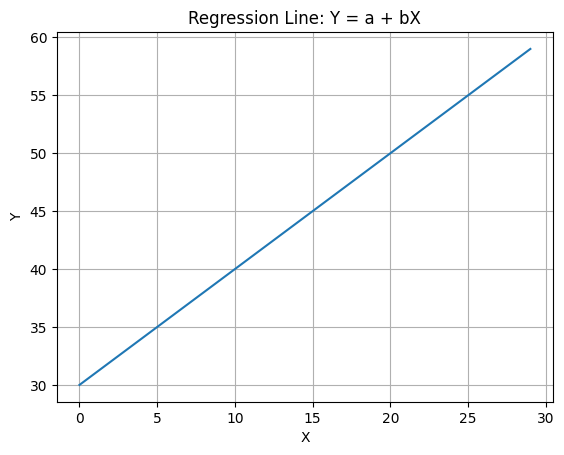

In [128]:
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [129]:
weight = 1
bias = 30

X = torch.arange(0, 30).unsqueeze(dim=1)
X

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29]])

In [130]:
Y = weight * X + bias
Y

tensor([[30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56],
        [57],
        [58],
        [59]])

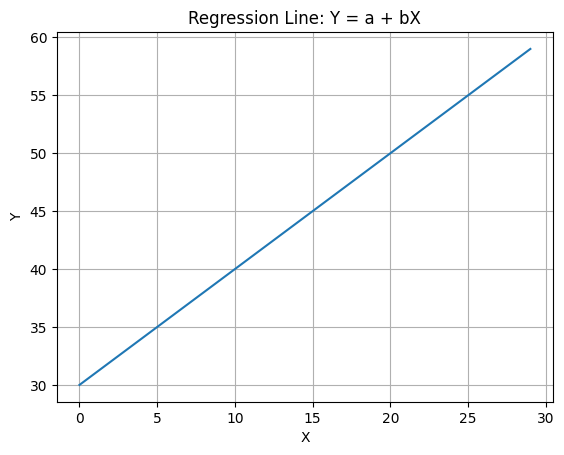

In [131]:
fig, ax = plt.subplots()
ax.plot(X.squeeze(), Y.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [132]:
# Splitting data training set, validation set, test set
weight = 0.01
bias = 0.3
SAMPLES = 1000

X = torch.arange(0, SAMPLES/1000, 1 / 1000).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

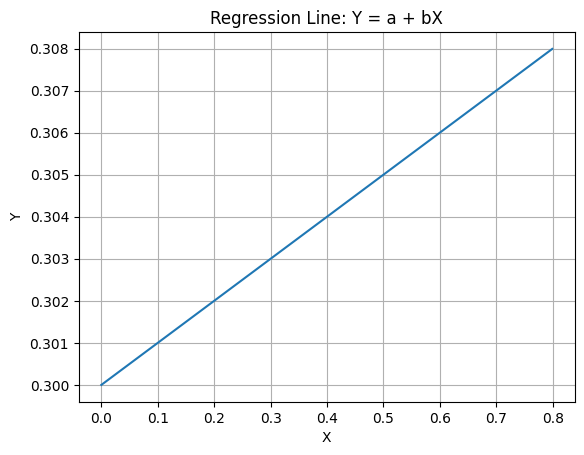

In [133]:
fig, ax = plt.subplots()
ax.plot(X_train.squeeze(), Y_train.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [134]:
def pp(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize=(10, 10))
    
    # plotting the train and test
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

    # predictions
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
    plt.legend(prop={"size" : 14})

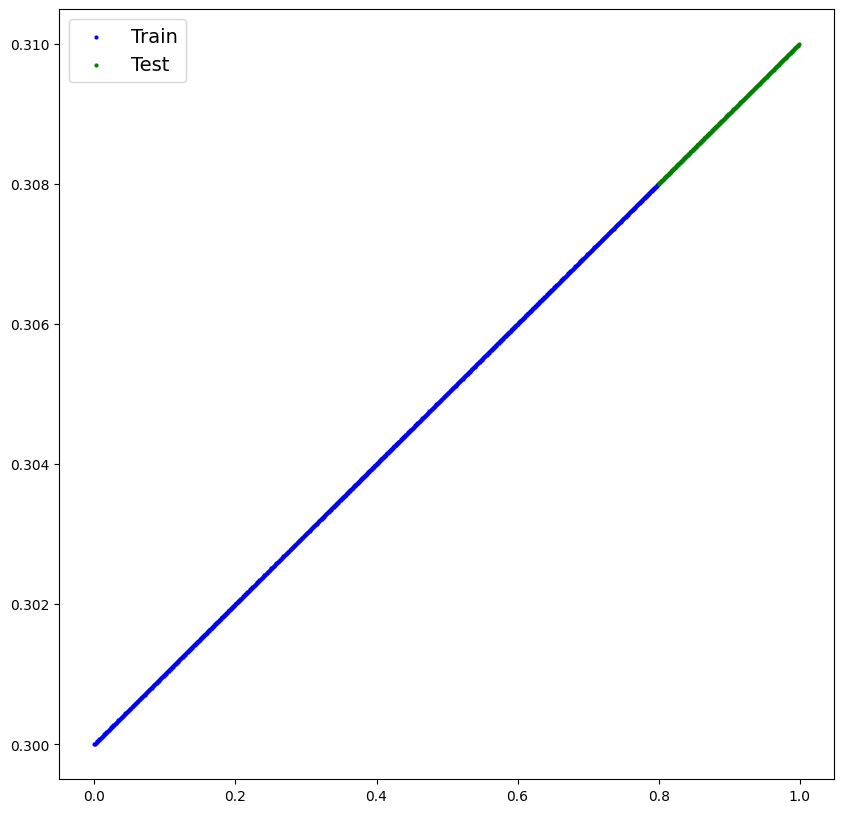

In [135]:
pp(X_train, Y_train, X_test, Y_test)

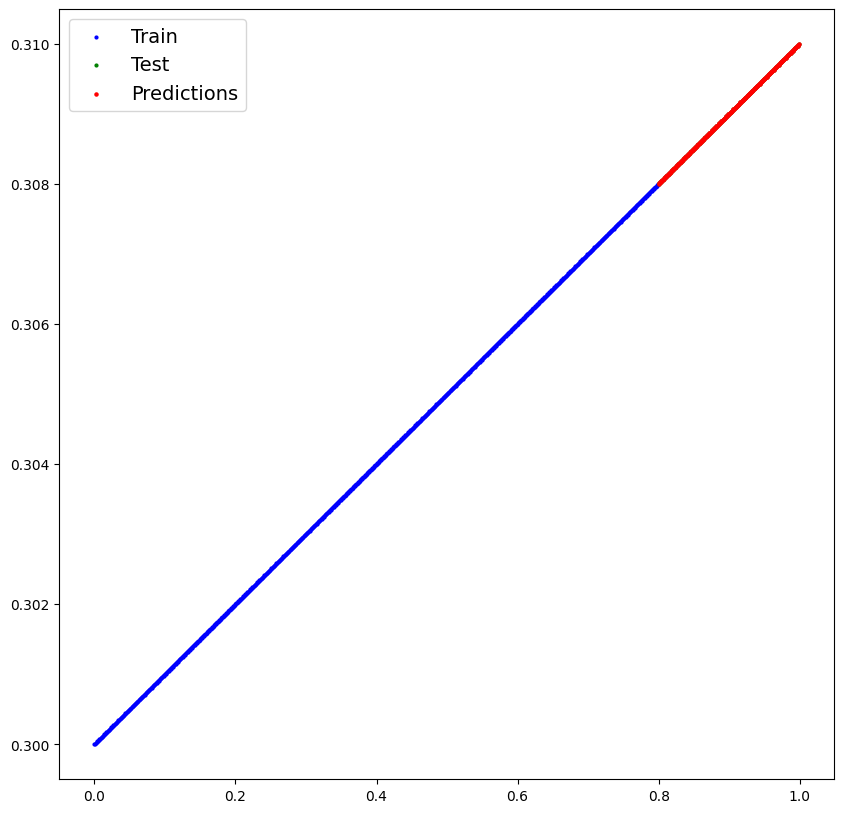

In [136]:

pp(X_train, Y_train, X_test, Y_test, Y_test)

In [137]:
# Splitting data training set, validation set, test set
weight = 0.01
bias = 0.30
SAMPLES = 1000

X = torch.arange(0, SAMPLES/1000, 1/1000).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

In [138]:
# Now lets create the predictions
# Create the model with linear regression
class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
    def __init__(self):
        super().__init__()
        # This are the parameters that the model wants to learn
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    # Forward functions define the computations of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# The goal of the model is to predict the correct weight and bias
# Il will adjust the weight and bias to get it correct
# With liear is using gradient decent to get to the ideal values

In [139]:
# !! Now we need to train the model with the data !!
# l_model = LinearRegressionModel()

#predictions = l_model.forward(X_train)
# Print
# pp(X_train, Y_train, X_test, Y_test, predictions)


In [140]:
# We want to know wat is insede the module
torch.manual_seed(432)

# Create an instance of the class
model = LinearRegressionModel()
params = list(model.parameters())
print(params)
(model.state_dict())

[Parameter containing:
tensor([-0.0796], requires_grad=True), Parameter containing:
tensor([-0.2294], requires_grad=True)]


OrderedDict([('weight', tensor([-0.0796])), ('bias', tensor([-0.2294]))])

In [141]:
# What we want is that model.state_dict() is as close as possible as a and b of Y = a + bX

In [142]:
# Without training we can try to predict Y_test

# Inference (making a prediction !)

In [143]:
with torch.inference_mode():
    predictions = model(X_test)

In [144]:
print(predictions[10: 20])

tensor([[-0.2938],
        [-0.2939],
        [-0.2940],
        [-0.2941],
        [-0.2942],
        [-0.2942],
        [-0.2943],
        [-0.2944],
        [-0.2945],
        [-0.2946]])


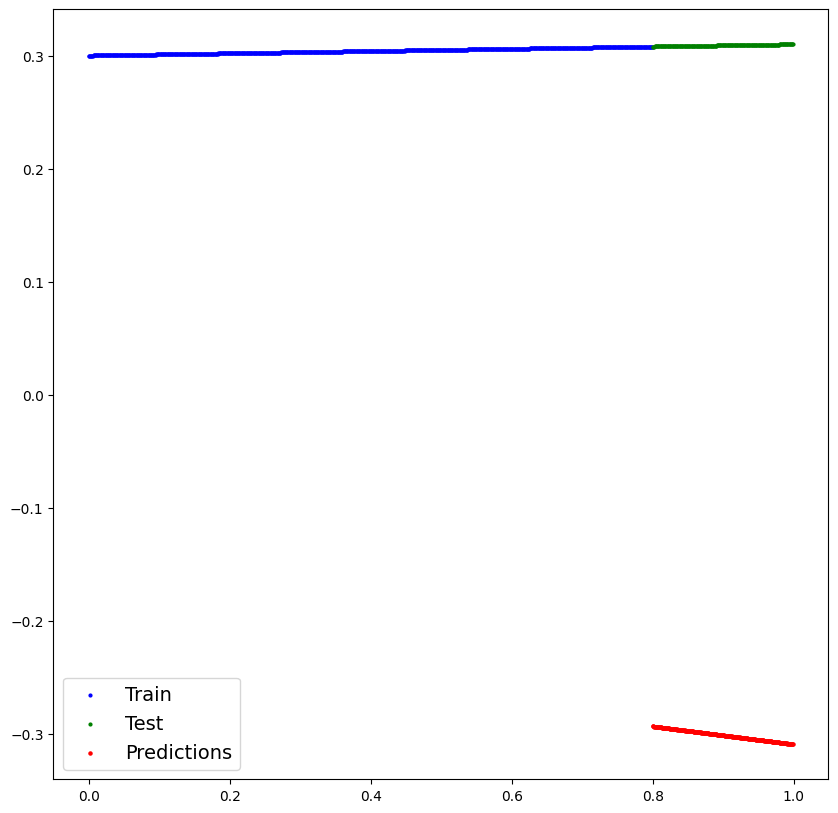

In [145]:
pp(X_train, Y_train, X_test, Y_test, predictions)

In [146]:
# This graph is not good, as we can see the prediction is random# Splitting data training set, validation set, test set
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

# model = LinearRegressionModel()
# with torch.inference_mode():
#     predictions = model(X_test)

# We can mesure the model goodness using a loss function
# lossf = nn.L1Loss()
# output = lossf(predictions, Y_test)
# print(f"Loss: {output}")

# print(f"LossBack: {output.backward()}")

# Training (lets make it learn from data)

In [147]:
# The optimizer will use a loss functino to understand how faroff of the goal it will be
# The optimizer will modify the parameters to lower the loss 

# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.001 # learning rate, a metaparameter
) 

# Optimizers and losses will come with experience

# Training loop and Testing loop
# 0. loop through the data
# 1. forward pass (data moving through the graph, make predictions)
# 2. Calculate the loss
# 3. Loss backward - move from the output to input to calculate gradients of the module
# 4. Optimization step:  gradient decent modify the weights
#   - this will adjust the parameters to reduce the loss

In [164]:
# Training
torch.manual_seed(41)
model = LinearRegressionModel()
print(list(model.parameters()))
# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.001 # learning rate, a metaparameter
)

epochs = 5000 # Hyperparameter to know how many loops
for epoch in range(epochs):
    # Set to training mode (for this we need grad=True)
    model.train() # Set the model to allow for gradient decent

    # Farward pass
    new_y_pred = model(X_train)

    # Calculate Loss (pred, real)
    loss = loss_func(new_y_pred, Y_train)
    l = loss
    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Optimize
    optimizer.step()

    # Testing
    model.eval()

    # Print dict
    print(f"weight: {model.state_dict()['weight'].item()}, bias : {model.state_dict()['bias'].item()}, loss: {l}")

[Parameter containing:
tensor([0.7906], requires_grad=True), Parameter containing:
tensor([-0.6410], requires_grad=True)]
weight: 0.7909563779830933, bias : -0.6399722099304199, loss: 0.9056513905525208
weight: 0.7913463711738586, bias : -0.6389722228050232, loss: 0.9044991731643677
weight: 0.791736364364624, bias : -0.6379722356796265, loss: 0.9033471941947937
weight: 0.7921263575553894, bias : -0.6369722485542297, loss: 0.9021950960159302
weight: 0.7925163507461548, bias : -0.635972261428833, loss: 0.9010429382324219
weight: 0.7929063439369202, bias : -0.6349722743034363, loss: 0.8998908996582031
weight: 0.7932963371276855, bias : -0.6339722871780396, loss: 0.8987387418746948
weight: 0.7936863303184509, bias : -0.6329723000526428, loss: 0.8975866436958313
weight: 0.7940763235092163, bias : -0.6319723129272461, loss: 0.8964346647262573
weight: 0.7944663166999817, bias : -0.6309723258018494, loss: 0.8952825665473938
weight: 0.7948563098907471, bias : -0.6299723386764526, loss: 0.894130

[Parameter containing:
tensor([0.7004], requires_grad=True), Parameter containing:
tensor([0.2994], requires_grad=True)]


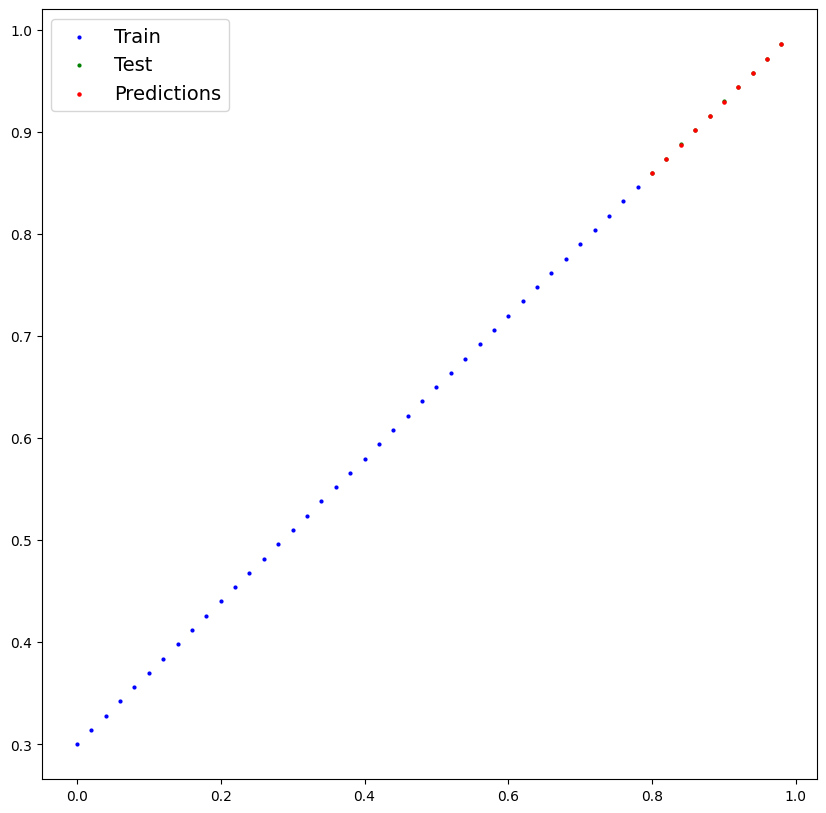

In [165]:
# Lets see
print(list(model.parameters()))
with torch.inference_mode():
    predictions = model(X_test)
pp(X_train, Y_train, X_test, Y_test, predictions)

In [184]:
import torch 
import torch.nn as nn

def run(device:str):
    torch.set_default_device(device)

    # Create the model with linear regression
    class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

    # Plotting
    def pp(train_data, train_labels, test_data, test_labels, predictions = None):
        train_data = train_data.cpu()
        train_labels = train_labels.cpu()
        test_data = test_data.cpu()
        test_labels = test_labels.cpu()

        plt.figure(figsize=(10, 10))
    
        # plotting the train and test
        plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
        plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

        # predictions
        if predictions != None:
            predictions = predictions.cpu()
            plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
        plt.legend(prop={"size" : 14})

    weight = 1
    bias = 30
    SAMPLES = 1000

    X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
    Y = weight * X + bias

    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    torch.manual_seed(2324)
    model = LinearRegressionModel()
    print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.001 # learning rate, a metaparameter
    )

    epochs = 100000 # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"weight: {model.state_dict()['weight'].item()}, bias : {model.state_dict()['bias'].item()}, loss: {l}")

    # Lets see
    print(list(model.parameters()))
    with torch.inference_mode():
        predictions = model(X_test)
    pp(X_train, Y_train, X_test, Y_test, predictions)


[Parameter containing:
tensor([-0.6134], requires_grad=True), Parameter containing:
tensor([2.8634], requires_grad=True)]
weight: -0.2138797640800476, bias : 2.8643877506256104, loss: 671.6818237304688
weight: 1.3672258853912354, bias : 3.7272424697875977, loss: 39.167240142822266
weight: 1.424370527267456, bias : 4.555936813354492, loss: 15.509295463562012
weight: 1.4003808498382568, bias : 5.357254505157471, loss: 24.291845321655273
weight: 1.3180071115493774, bias : 6.135908126831055, loss: 56.421504974365234
weight: 1.289997935295105, bias : 6.893162250518799, loss: 66.85392761230469
weight: 1.4116820096969604, bias : 7.624894618988037, loss: 17.50939178466797
weight: 1.3981571197509766, bias : 8.33720588684082, loss: 22.200273513793945
weight: 1.3317234516143799, bias : 9.02884292602539, loss: 48.04890060424805
weight: 1.3812968730926514, bias : 9.701210021972656, loss: 27.57195281982422
[Parameter containing:
tensor([0.9772], requires_grad=True), Parameter containing:
tensor([10.

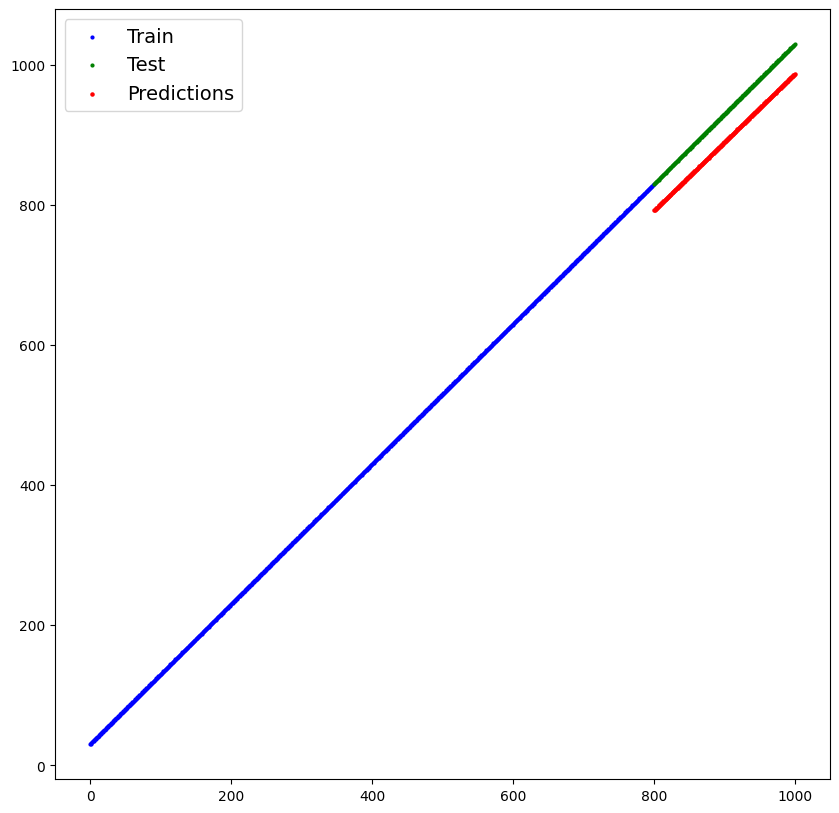

In [185]:
%%time
run("cpu")

[Parameter containing:
tensor([-0.4678], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.5958], device='cuda:0', requires_grad=True)]
weight: -0.06825470179319382, bias : -0.5948130488395691, loss: 616.9638061523438
weight: 1.0129072666168213, bias : 0.3654070496559143, loss: 135.16836547851562
weight: 0.9538490772247314, bias : 1.292099118232727, loss: 111.99920654296875
weight: 1.0309011936187744, bias : 2.197404146194458, loss: 144.30921936035156
weight: 0.9448162317276001, bias : 3.0739293098449707, loss: 110.12210845947266
weight: 0.9659233093261719, bias : 3.929093837738037, loss: 119.69194793701172
weight: 0.97187739610672, bias : 4.751096725463867, loss: 122.91786193847656
weight: 1.0200440883636475, bias : 5.553743362426758, loss: 143.2830047607422
weight: 1.027030348777771, bias : 6.330848693847656, loss: 146.8234100341797
weight: 0.993698000907898, bias : 7.080855846405029, loss: 134.17230224609375
[Parameter containing:
tensor([1.3635], device='cuda:0

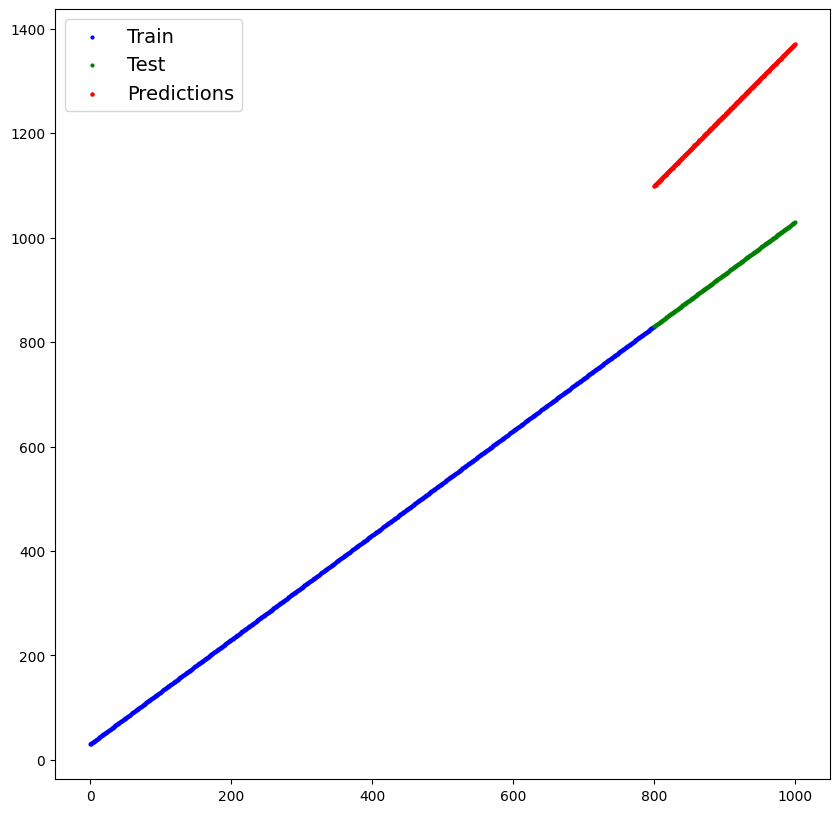

In [186]:
%%time
run("cuda")